<a href="https://colab.research.google.com/github/pe8sutd/DSL2025/blob/main/eda4u_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/pe8sutd/eda4u &> /dev/null
!git clone https://github.com/pe8sutd/eda4u &> /dev/null
%load_ext plugin

You need to run the above setup everytime you login to the Colab, if you want to run this online EDA.

### %%print_verilog

Using %%print_verilog, the schematic of the Verilog HDL design can be generated for reference.

Installing. Please wait... done!


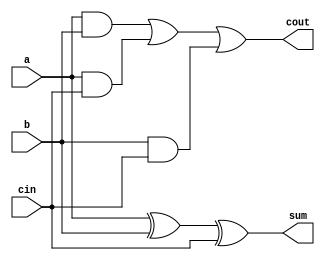

In [ ]:
%%print_verilog

//-----//
module c_fa(
    output cout,
    output sum,
    input a,
    input b,
    input cin);

  assign cout = (a&b)|(a&cin)|(b&cin);
  assign sum = a^b^cin;

endmodule
//-----//

## %%verilog

Most of the time, only need to use %%verilog to simulate the Verilog module, with Testbench.
The modules, and testbench must be included in the same Cell. The above Cell that include the adder module is not seen in the below Cell, thus the adder module is again included in the below cell.

If you include testbench:
1. You should only use %%verilog, but not %%print_verilog. Otherwise there will be syntax error;
1. You must include $finish; in the testbench. Otherwise, the Cell will be runing the simulation and non-stop;

In [ ]:
%%verilog

//carry ripple adder
module c_cra (
    output cout,
    output [3:0] sum,
    input [3:0] a, b,
    input cin
  );

  wire [3:0] c;
  assign c[0] = cin;

  c_fa fa3(.cout(cout), .sum(sum[3]), .a(a[3]), .b(b[3]), .cin(c[3]) );
  c_fa fa2(.cout(c[3]), .sum(sum[2]), .a(a[2]), .b(b[2]), .cin(c[2]) );
  c_fa fa1(.cout(c[2]), .sum(sum[1]), .a(a[1]), .b(b[1]), .cin(c[1]) );
  c_fa fa0(.cout(c[1]), .sum(sum[0]), .a(a[0]), .b(b[0]), .cin(c[0]) );

endmodule
//-----//

//-----//
module c_fa(
    output cout,
    output sum,
    input a,
    input b,
    input cin);

  assign cout = (a&b)|(a&cin)|(b&cin);
  assign sum = a^b^cin;

endmodule
//-----//

//-----//
module c_cra_tb();
    wire cout;
    wire [3:0] sum;
    reg [3:0] a, b;
    reg cin;

    c_cra dut (.cout(cout), .sum(sum), .a(a), .b(b), .cin(cin));

    reg [4:0] q;
    always @(*) begin
        q[4:0] = {cout,sum[3:0]};
    end

    // Test stimulus
    initial begin
        $dumpfile("c_cra.vcd");
        $dumpvars;

        a = 4'b0000; b = 4'b0000; cin = 1'b0;
        // Test case 1: cin = 0, sum of a and b
        #1 a = 4'b1111; b = 4'b0001; cin = 1'b0;
        #1;
        if (q !== 5'b10000) $display("Test case 1 failed! q = %b", q);
        else $display("Test case 1 passed.");

        // Test case 2: cin = 1, sum of a and b
        #1 a = 4'b0111; b = 4'b0000; cin = 1'b1;
        #1;
        if (q !== 5'b01000) $display("Test case 2 failed! q = %b", q);
        else $display("Test case 2 passed.");

        // Test case 3: cin = 10, sum of a and b
        #1 a = 4'b1111; b = 4'b1111; cin = 1'b1;
        #1;
        if (q !== 5'b11111) $display("Test case 3 failed! q = %b", q);
        else $display("Test case 3 passed.");

        // Test case 4: cin = 10, sum of a and b
        #1 a = 4'b1111; b = 4'b1111; cin = 1'b0;
        #1;
        if (q !== 5'b11110) $display("Test case 4 failed! q = %b", q);
        else $display("Test case 3 passed.");

        //
        #1 a = 4'b0000; b = 4'b0000; cin = 1'b0;

        #1 $finish;

        $dumpoff;
    end

endmodule


VCD info: dumpfile c_cra.vcd opened for output.
Test case 1 passed.
Test case 2 passed.
Test case 3 passed.
Test case 3 passed.



## %%waveform

You can choose to plot the waveform using %%waveform, where it will take the saved file from above Cell, c_cra.vcd, to plot the waveform. The file name must be specificed in the above Cell.

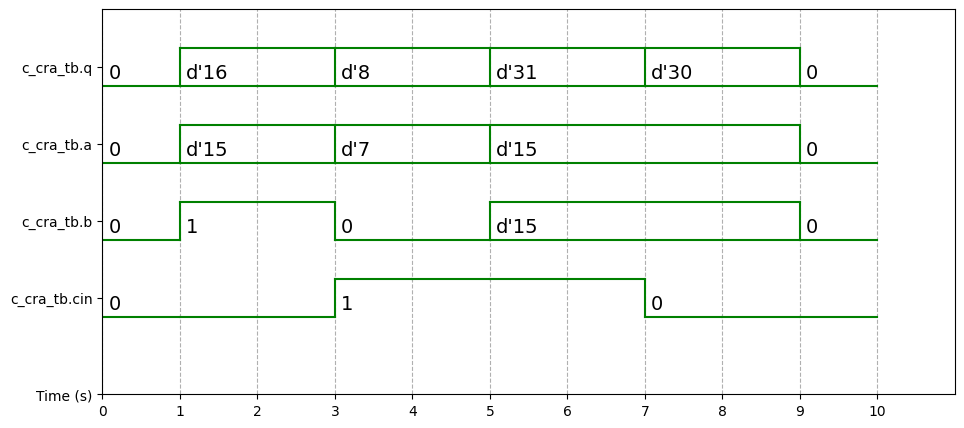

In [ ]:
%%waveform c_cra.vcd
sign_list = ['c_cra_tb.q','c_cra_tb.a', 'c_cra_tb.b', 'c_cra_tb.cin']
time_begin = 0
time_end = 10
base = 'dec' # bin, dec, dec2, hex, octal